In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
google_app=pd.read_csv('googleplaystore.csv')

In [3]:
google_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

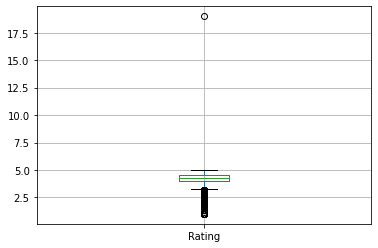

In [5]:
# boxplot to find outliers
google_app.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

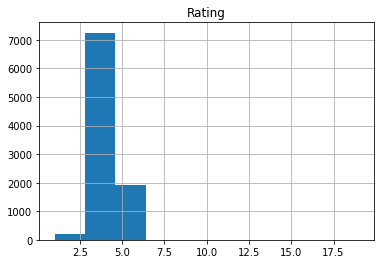

In [6]:
google_app.hist()

In [7]:
google_app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
google_app.isnull().head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# google app rating can't be more than 5
google_app[google_app.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
google_app.drop([10472],inplace=True)

In [11]:
# row 10472 is deleted from the datafrome
google_app[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<AxesSubplot:>

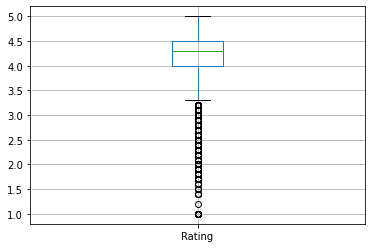

In [12]:
# now outlier is removed
google_app.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

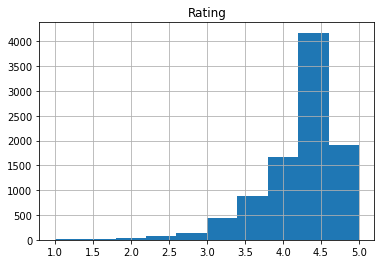

In [13]:
google_app.hist()

In [14]:
# fill the null values in rating series by median of that series
def impute_median(series):
    return series.fillna(series.median())

In [15]:
google_app.Rating=impute_median(google_app['Rating'])

In [16]:
google_app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [17]:
# we can't take median in case of Type, Current Ver and Android Ver series therefore we fill null values by mode of that series
print(google_app['Type'].mode())
print(google_app['Current Ver'].mode())
print(google_app['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [18]:
google_app['Type'].fillna(google_app['Type'].mode().values[0],inplace=True)

In [19]:
google_app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
google_app['Current Ver'].fillna(google_app['Current Ver'].mode().values[0],inplace=True)
google_app['Android Ver'].fillna(google_app['Android Ver'].mode().values[0],inplace=True)

In [21]:
google_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
google_app.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [25]:
# convert reviews series from object to int data type
google_app['Reviews']=pd.to_numeric(google_app['Reviews'],errors='coerce')

In [26]:
# convert Install series from object to float data type
google_app['Installs']=google_app['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
google_app['Installs']=google_app['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
google_app['Installs']=google_app['Installs'].apply(lambda x: float(x))

In [27]:
# convert Price series from object to float data type
google_app['Price']=google_app['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))
google_app['Price']=google_app['Price'].apply(lambda x:float(x))

In [28]:
google_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [29]:
google_app.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [30]:
# analyzing data from 
grp=google_app.groupby('Category')
w=grp['Rating'].mean()
x=grp['Reviews'].mean()
y=grp['Installs'].sum()
z=grp['Price'].sum()

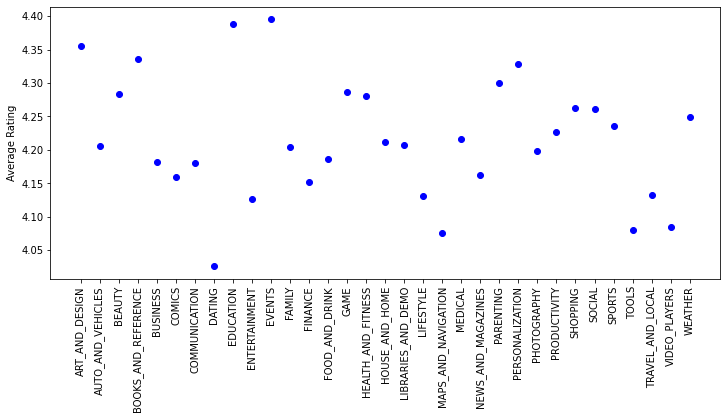

In [32]:
# plot average Rating of different category wise of apps
plt.figure(figsize=(12,5))
plt.plot(w,'bo')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

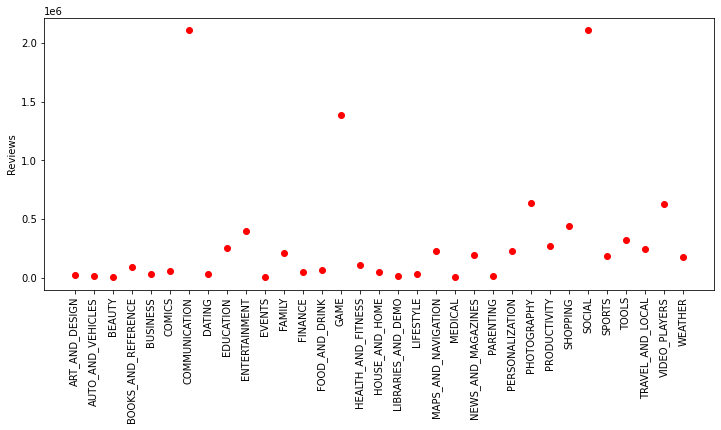

In [33]:
# plot average Reviews of different category wise of apps
plt.figure(figsize=(12,5))
plt.plot(x,'ro')
plt.ylabel('Reviews')
plt.xticks(rotation=90)
plt.show()

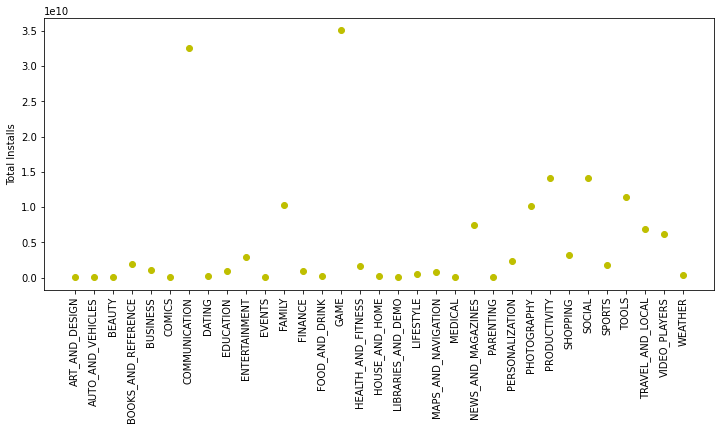

In [34]:
# plot total installs of different category wise of apps
plt.figure(figsize=(12,5))
plt.plot(y,'yo')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.show()

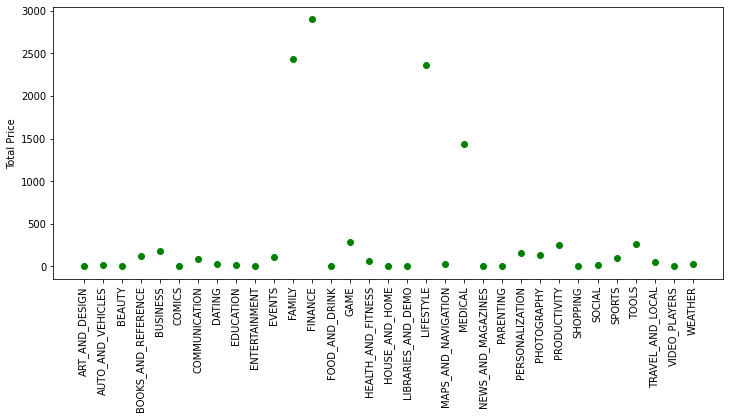

In [35]:
# plot total Price of different category wise of apps
plt.figure(figsize=(12,5))
plt.plot(z,'go')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()

In [36]:
# export the updated data frame to new excel file
google_app.to_csv('updated google app.csv',index=False)